# Student average monthly spend prediction

#### Importing necessary libraries

In [1]:
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

#### Loading the dataset

In [4]:
df = pd.read_excel("Student_data1.xlsx")

#### Overview of the dataset

In [6]:
df.head()

,matric_num,Name,gender,age,course_of_study,resumed_with_provision_bag,cars_owned,address/neighborhood,hall_of_residence,level,has_both_parents,avg_monthly_allowance,is_chapel_worker,is_member_of_src,breadwinner_parent_occupation,is_nigerian,avg_monthly_spend
0,19/6451,Aminu Adesina,F,24,Architecture,False,0,Ojo,6-bedded,Masters,0.0,77037.626557,False,True,Architect,True,58184.34
1,23/4757,Chiamaka Kayode,F,26,Nursing,False,1,Ikoyi,4-bedded,200,0.0,96526.765772,True,True,Businesswoman,True,72312.13
2,23/7289,Tobiloba Adeniyan,M,23,Cyber Security,True,2,Surulere,4-bedded,200,1.0,71626.780320,True,True,Architect,True,46733.26
3,21/4288,Adedayo Olubunmi,M,23,Nursing,True,1,Mushin,6-bedded,400,0.0,77881.642891,False,True,Trader,False,32494.33
4,21/1398,Obioma Ladega,F,17,Criminology,False,2,Marina,4-bedded,400,0.0,83122.550005,False,False,NaN,True,64434.99


In [7]:
df.shape

(4696, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4696 entries, 0 to 4695
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   matric_num                     4696 non-null   object 
 1   Name                           4696 non-null   object 
 2   gender                         4696 non-null   object 
 3   age                            4696 non-null   int64  
 4   course_of_study                4696 non-null   object 
 5   resumed_with_provision_bag     4696 non-null   bool   
 6   cars_owned                     4696 non-null   int64  
 7   address/neighborhood           4696 non-null   object 
 8   hall_of_residence              4696 non-null   object 
 9   level                          4696 non-null   object 
 10  has_both_parents               4664 non-null   float64
 11  avg_monthly_allowance          4696 non-null   float64
 12  is_chapel_worker               4696 non-null   b

#### Summary statistics

In [10]:
df.describe(include = 'all')

,matric_num,Name,gender,age,course_of_study,resumed_with_provision_bag,cars_owned,address/neighborhood,hall_of_residence,level,has_both_parents,avg_monthly_allowance,is_chapel_worker,is_member_of_src,breadwinner_parent_occupation,is_nigerian,avg_monthly_spend
count,4696,4696,4696,4696.000000,4696,4696,4696.000000,4696,4696,4696.0,4664.000000,4696.000000,4696,4696,4073,4696,4696.000000
unique,4443,3998,2,NaN,14,2,NaN,19,4,4.0,NaN,NaN,2,2,7,2,NaN
top,22/2135,Simisola Ehigiator,F,NaN,Industrial Chemistry,True,NaN,Marina,2-bedded,400.0,NaN,NaN,True,False,Doctor,True,NaN
freq,3,5,2362,NaN,356,2367,NaN,298,1594,1840.0,NaN,NaN,2415,2366,613,3558,NaN
mean,NaN,NaN,NaN,20.983603,NaN,NaN,1.193569,NaN,NaN,NaN,0.508576,69345.850184,NaN,NaN,NaN,NaN,69463.893684
std,NaN,NaN,NaN,4.397447,NaN,NaN,1.184300,NaN,NaN,NaN,0.499980,25751.018130,NaN,NaN,NaN,NaN,28776.970887
min,NaN,NaN,NaN,15.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,20900.000000,NaN,NaN,NaN,NaN,20046.990000
25%,NaN,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,49128.406471,NaN,NaN,NaN,NaN,44147.450000
50%,NaN,NaN,NaN,21.000000,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,66467.878015,NaN,NaN,NaN,NaN,69517.635000
75%,NaN,NaN,NaN,24.000000,NaN,NaN,2.000000,NaN,NaN,NaN,1.000000,83934.916772,NaN,NaN,NaN,NaN,94264.410000


#### Checking for missing values and duplicates

In [12]:
df.isnull().sum()

matric_num                         0
Name                               0
gender                             0
age                                0
course_of_study                    0
resumed_with_provision_bag         0
cars_owned                         0
address/neighborhood               0
hall_of_residence                  0
level                              0
has_both_parents                  32
avg_monthly_allowance              0
is_chapel_worker                   0
is_member_of_src                   0
breadwinner_parent_occupation    623
is_nigerian                        0
avg_monthly_spend                  0
dtype: int64

In [13]:
df[df['breadwinner_parent_occupation'].isnull()]

,matric_num,Name,gender,age,course_of_study,resumed_with_provision_bag,cars_owned,address/neighborhood,hall_of_residence,level,has_both_parents,avg_monthly_allowance,is_chapel_worker,is_member_of_src,breadwinner_parent_occupation,is_nigerian,avg_monthly_spend
4,21/1398,Obioma Ladega,F,17,Criminology,False,2,Marina,4-bedded,400,0.0,83122.550005,False,False,NaN,True,64434.99
5,21/9316,Adedayo Chidozie,M,22,Political Science,True,0,Ajah,2-bedded,400,1.0,75729.966062,False,False,NaN,False,110038.53
11,22/6433,Ayebatari Aderinsola,F,21,Political Science,True,0,Ikeja,4-bedded,300,0.0,75567.152028,False,True,NaN,True,87593.12
19,19/8802,Lola Babalola,F,18,Computer Science,False,1,Ajah,2-bedded,Masters,1.0,86862.515183,False,False,NaN,True,84102.08
22,23/3580,Chizoba Ngozi,F,26,Economics,False,4,Maitama,2-bedded,200,0.0,51458.878108,True,False,NaN,False,39344.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4676,19/9025,Funmilade Obianuju,M,17,Biochemistry,False,6,Maryland,6-bedded,Masters,1.0,31278.166730,False,False,NaN,False,81215.65
4677,23/3013,Cherechi Jamiu,F,20,International Relations,True,1,Ikoyi,6-bedded,200,1.0,48508.905831,True,True,NaN,True,25355.68
4690,23/9086,Omawunmi Ajose-adeogun,F,25,Mass Communication,False,0,Ikoyi,2-bedded,200,0.0,134180.982411,True,True,NaN,True,118736.14
4694,21/5842,Akanni Olutola,M,23,Economics,True,2,Maryland,6-bedded,400,1.0,66611.251779,False,True,NaN,False,103584.16


In [14]:
df.dropna(inplace=True)

In [15]:
df.reset_index(drop=True, inplace=True)

In [16]:
df.isnull().sum()

matric_num                       0
Name                             0
gender                           0
age                              0
course_of_study                  0
resumed_with_provision_bag       0
cars_owned                       0
address/neighborhood             0
hall_of_residence                0
level                            0
has_both_parents                 0
avg_monthly_allowance            0
is_chapel_worker                 0
is_member_of_src                 0
breadwinner_parent_occupation    0
is_nigerian                      0
avg_monthly_spend                0
dtype: int64

In [17]:
df.shape

(4046, 17)

In [18]:
df.duplicated().sum()

0

There are no duplicates cool!

#### Lets see the distribution of average monthly spend acroos different categories

#### Gender

In [22]:
df['gender'].value_counts().to_frame()

,count
gender,
F,2042
M,2004


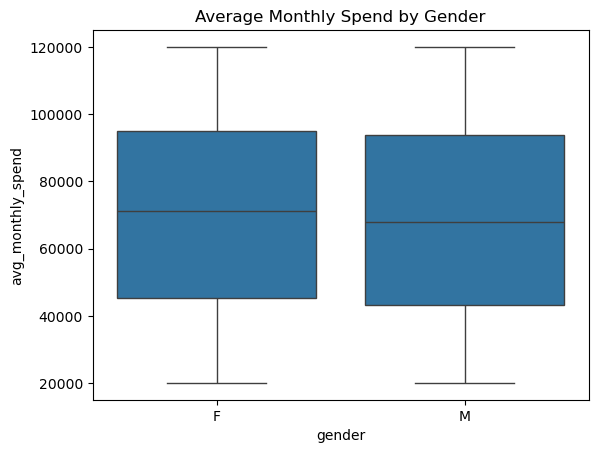

In [23]:
# Box plot to see avg_monthly_spend across genders
sns.boxplot(x='gender', y='avg_monthly_spend', data=df)
plt.title("Average Monthly Spend by Gender")
plt.show()

Both genders have a similar distribution in terms of average monthly spend. The central tendencies (medians) and the spread of the spending are nearly identical, suggesting that there is no significant difference in monthly spending between males and females in the dataset.

#### Level

In [26]:
df['level'].value_counts().to_frame()

,count
level,
400,1583
200,859
300,829
Masters,775


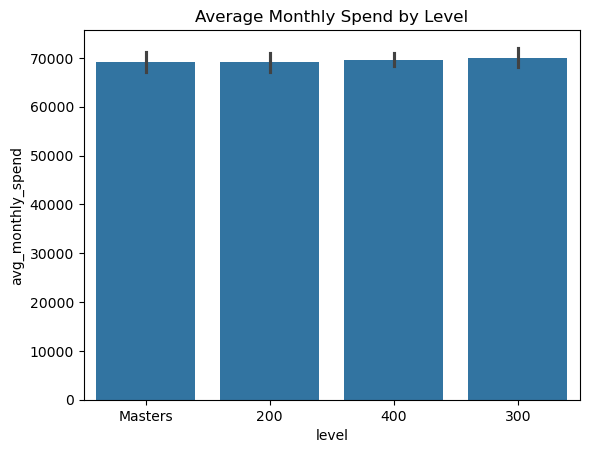

In [27]:
# barplot plot to visualize avg_monthly_spend across different levels of study
sns.barplot(x='level', y='avg_monthly_spend', data=df)
plt.title("Average Monthly Spend by Level")
plt.show()

There seems to be no significant difference in average monthly spending across the different academic levels.
The consistency in average spending and small error bars suggest that students, regardless of their academic level, have similar financial habits or constraints in terms of monthly expenses.

#### Course of study

In [30]:
df['course_of_study'].value_counts()

course_of_study
Industrial Chemistry       310
Mass Communication         305
Cyber Security             299
Business Administration    297
Biochemistry               297
Accounting                 294
Criminology                294
International Relations    291
Microbiology               286
Nursing                    284
Computer Science           282
Economics                  275
Political Science          268
Architecture               264
Name: count, dtype: int64

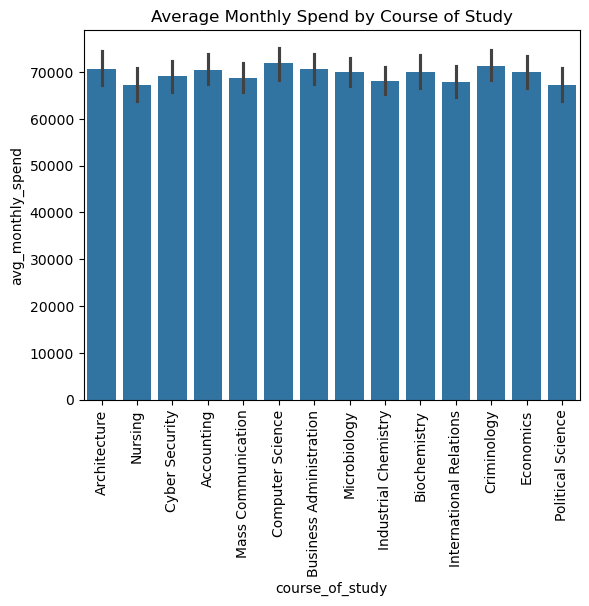

In [31]:
# Bar plot to show average spend across different courses of study
sns.barplot(x='course_of_study', y='avg_monthly_spend', data=df, estimator=np.mean)
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.title("Average Monthly Spend by Course of Study")
plt.show()

The chart suggests that students from different fields of study have very similar spending habits, with no major outliers in terms of average monthly expenses. This could imply that regardless of the field of study, students face similar financial demands or constraints.

#### Hall of Residence

In [34]:
df['hall_of_residence'].value_counts()

hall_of_residence
2-bedded    1376
6-bedded    1343
4-bedded    1326
8-bedded       1
Name: count, dtype: int64

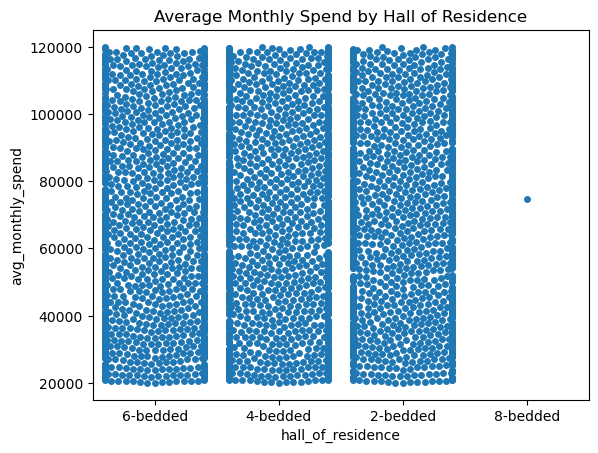

In [35]:
# Swarm plot to show the distribution of average monthly spend by hall of residence
sns.swarmplot(x='hall_of_residence', y='avg_monthly_spend', data=df)
plt.title("Average Monthly Spend by Hall of Residence")
plt.show()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   matric_num                     4046 non-null   object 
 1   Name                           4046 non-null   object 
 2   gender                         4046 non-null   object 
 3   age                            4046 non-null   int64  
 4   course_of_study                4046 non-null   object 
 5   resumed_with_provision_bag     4046 non-null   bool   
 6   cars_owned                     4046 non-null   int64  
 7   address/neighborhood           4046 non-null   object 
 8   hall_of_residence              4046 non-null   object 
 9   level                          4046 non-null   object 
 10  has_both_parents               4046 non-null   float64
 11  avg_monthly_allowance          4046 non-null   float64
 12  is_chapel_worker               4046 non-null   b

In [38]:
df['resumed_with_provision_bag'] = df['resumed_with_provision_bag'].astype(int)

In [39]:
df['is_chapel_worker'] = df['is_chapel_worker'].astype(int)

In [40]:
df['is_member_of_src'] = df['is_member_of_src'].astype(int)

In [41]:
df['is_nigerian'] = df['is_nigerian'].astype(int)

In [42]:
df['has_both_parents'] = df['has_both_parents'].astype(int)

#### Encoding categorical columns

##### Gender

In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender_encoded'] = le.fit_transform(df['gender'])

##### Level

Ordinal Encoding (because the levels represent a clear progression, where 400 is higher than 300, and so on).

In [48]:
df['level'].dtype

dtype('O')

In [49]:
print(df['level'].unique())

['Masters' 200 400 300]


In [50]:
df['level_cleaned'] = df['level'].astype(str).str.strip().str.lower()

In [51]:
print(df['level_cleaned'].unique())

['masters' '200' '400' '300']


In [52]:
# Define the ordinal mapping
level_mapping = {
    '200': 1,
    '300': 2,
    '400': 3,
    'masters': 4
}

# Apply the mapping
df['level_encoded'] = df['level_cleaned'].map(level_mapping)

# Check if there are any NaN values left (unrecognized values)
print(df['level_encoded'].isna().sum())

# Optional: Print any unrecognized levels
print(df[df['level_encoded'].isna()]['level_cleaned'].unique())

0
[]


In [53]:
df['level_encoded']

0       4
1       1
2       1
3       3
4       3
       ..
4041    4
4042    3
4043    3
4044    3
4045    3
Name: level_encoded, Length: 4046, dtype: int64

##### Course of study

One-Hot Encoding (since this is nominal data, there’s no inherent order between courses, so each course should have its own column).

In [56]:
df = pd.get_dummies(df, columns=['course_of_study'], drop_first=True)

##### Hall of residence

One-Hot Encoding (each type of hall is distinct and non-ordinal, so treat them as separate categories).

In [59]:
df = pd.get_dummies(df, columns=['hall_of_residence'], drop_first=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Data columns (total 34 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   matric_num                               4046 non-null   object 
 1   Name                                     4046 non-null   object 
 2   gender                                   4046 non-null   object 
 3   age                                      4046 non-null   int64  
 4   resumed_with_provision_bag               4046 non-null   int32  
 5   cars_owned                               4046 non-null   int64  
 6   address/neighborhood                     4046 non-null   object 
 7   level                                    4046 non-null   object 
 8   has_both_parents                         4046 non-null   int32  
 9   avg_monthly_allowance                    4046 non-null   float64
 10  is_chapel_worker                         4046 no

#### Feature Engineering to increase model performance

In [81]:
df['spend_to_allowance_ratio'] = df['avg_monthly_spend'] / df['avg_monthly_allowance']

In [82]:
df['allowance_per_year'] = df['avg_monthly_allowance'] * 12

#### Checking for relationship between the target vector and scalar matrix

In [87]:
df.head()

,matric_num,Name,gender,age,resumed_with_provision_bag,cars_owned,address/neighborhood,level,has_both_parents,avg_monthly_allowance,...,course_of_study_International Relations,course_of_study_Mass Communication,course_of_study_Microbiology,course_of_study_Nursing,course_of_study_Political Science,hall_of_residence_4-bedded,hall_of_residence_6-bedded,hall_of_residence_8-bedded,spend_to_allowance_ratio,allowance_per_year
0,19/6451,Aminu Adesina,F,24,0,0,Ojo,Masters,0,77037.626557,...,False,False,False,False,False,False,True,False,0.755272,9.244515e+05
1,23/4757,Chiamaka Kayode,F,26,0,1,Ikoyi,200,0,96526.765772,...,False,False,False,True,False,True,False,False,0.749141,1.158321e+06
2,23/7289,Tobiloba Adeniyan,M,23,1,2,Surulere,200,1,71626.780320,...,False,False,False,False,False,True,False,False,0.652455,8.595214e+05
3,21/4288,Adedayo Olubunmi,M,23,1,1,Mushin,400,0,77881.642891,...,False,False,False,True,False,False,True,False,0.417227,9.345797e+05
4,20/2055,Nnamdi Katherine,M,21,1,1,Yaba,400,0,60717.034963,...,False,False,False,False,False,False,True,False,0.466973,7.286044e+05


#### Correlation Matrix

It shows the linear relationships between features and between each feature and the target variable. 

In [91]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'int32', 'float64', 'bool'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

correlation_matrix

,age,resumed_with_provision_bag,cars_owned,has_both_parents,avg_monthly_allowance,is_chapel_worker,is_member_of_src,is_nigerian,avg_monthly_spend,gender_encoded,...,course_of_study_International Relations,course_of_study_Mass Communication,course_of_study_Microbiology,course_of_study_Nursing,course_of_study_Political Science,hall_of_residence_4-bedded,hall_of_residence_6-bedded,hall_of_residence_8-bedded,spend_to_allowance_ratio,allowance_per_year
age,1.000000,0.003877,0.010130,-0.008909,-0.010089,0.019421,0.002481,0.014383,0.002733,-0.006918,...,-0.007565,0.028698,-0.026431,-0.004603,-0.004554,-0.004810,0.001536,0.003613,0.005250,-0.010089
resumed_with_provision_bag,0.003877,1.000000,0.006821,-0.010869,0.017648,-0.026820,0.014880,-0.001794,-0.030218,-0.015782,...,-0.009711,0.012914,0.000838,0.026002,0.024786,-0.021717,0.009284,0.015661,-0.040175,0.017648
cars_owned,0.010130,0.006821,1.000000,-0.013496,0.032862,0.005413,0.010873,0.010297,0.022519,-0.007138,...,-0.005858,0.009378,0.002239,-0.019441,0.003702,-0.021771,-0.000227,-0.015953,-0.009386,0.032862
has_both_parents,-0.008909,-0.010869,-0.013496,1.000000,0.001773,0.004494,-0.014355,-0.021011,-0.004854,-0.004463,...,-0.010110,-0.002385,0.013910,-0.046031,0.024246,-0.020027,0.023614,0.015747,-0.006738,0.001773
avg_monthly_allowance,-0.010089,0.017648,0.032862,0.001773,1.000000,0.001744,0.000431,0.015798,0.361540,-0.021822,...,-0.023390,0.004468,-0.001990,-0.009249,-0.028851,0.012495,-0.002620,-0.002429,-0.449031,1.000000
is_chapel_worker,0.019421,-0.026820,0.005413,0.004494,0.001744,1.000000,-0.026840,0.000962,-0.009762,-0.022970,...,0.006233,0.000098,-0.025412,-0.027374,0.002171,-0.019318,0.004112,-0.016189,-0.015857,0.001744
is_member_of_src,0.002481,0.014880,0.010873,-0.014355,0.000431,-0.026840,1.000000,0.002797,0.015362,-0.001599,...,0.021618,-0.012387,-0.015879,-0.017890,0.003292,-0.004009,0.030232,0.015919,0.016330,0.000431
is_nigerian,0.014383,-0.001794,0.010297,-0.021011,0.015798,0.000962,0.002797,1.000000,0.007936,-0.015118,...,-0.005130,0.000222,0.016831,-0.000001,0.011846,-0.007171,-0.006988,-0.027755,-0.000350,0.015798
avg_monthly_spend,0.002733,-0.030218,0.022519,-0.004854,0.361540,-0.009762,0.015362,0.007936,1.000000,-0.024737,...,-0.016726,-0.007553,0.003838,-0.022110,-0.021866,0.026406,-0.017645,0.002890,0.618185,0.361540
gender_encoded,-0.006918,-0.015782,-0.007138,-0.004463,-0.021822,-0.022970,-0.001599,-0.015118,-0.024737,1.000000,...,0.007398,-0.011361,0.000662,-0.012899,-0.015388,-0.016612,0.013444,-0.015576,-0.007176,-0.021822


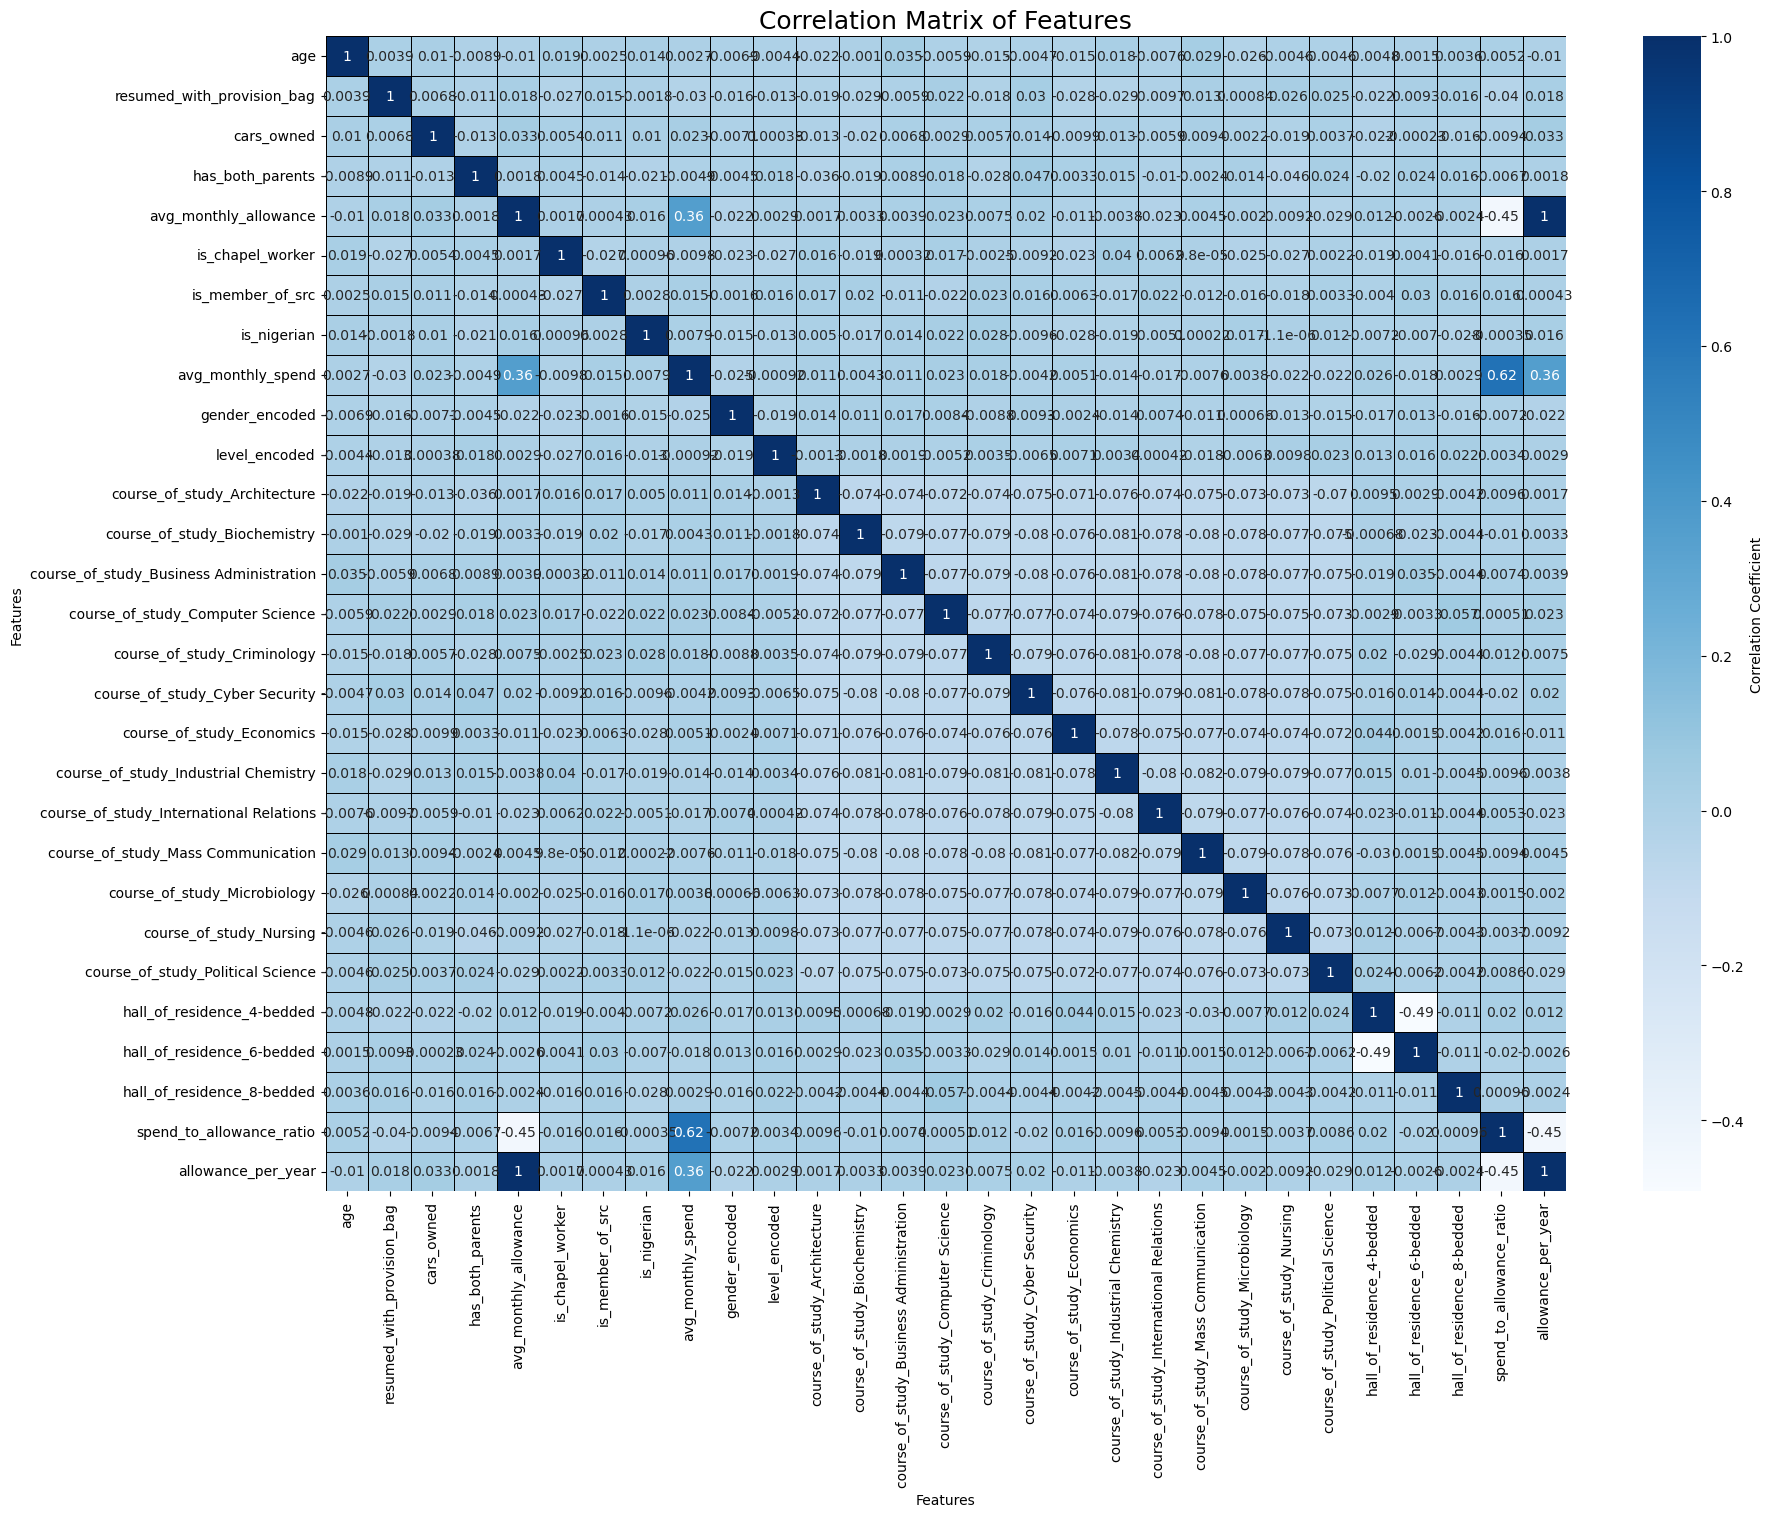

In [148]:
plt.figure(figsize=(20, 15)) 
sns.heatmap(correlation_matrix, 
            annot=True,
            cmap="Blues",           
            linewidths=0.5,           
            linecolor='black',        
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix of Features', fontsize=18)
plt.xlabel('Features', fontsize=10)
plt.ylabel('Features', fontsize=10)

plt.show()

#### Variance Threshold

The VarianceThreshold method removes features with very low variance. Low variance features don’t provide useful information for the model, as they are nearly constant across all samples.

In [95]:
from sklearn.feature_selection import VarianceThreshold

# Separate the features (X) and the target variable (y)
X = df.drop(columns=['avg_monthly_spend', 'matric_num', 'Name', 'gender', 'breadwinner_parent_occupation', 'level_cleaned', 'level', 'address/neighborhood'])
y = df['avg_monthly_spend']

# Create the VarianceThreshold object with a specified threshold
selector = VarianceThreshold(threshold=0.1)

# Fit the model on the feature data
X_var_thresh = selector.fit_transform(X)

# Check which features remain
remaining_features = X.columns[selector.get_support()]
print(remaining_features)


Index(['age', 'resumed_with_provision_bag', 'cars_owned', 'has_both_parents',
       'avg_monthly_allowance', 'is_chapel_worker', 'is_member_of_src',
       'is_nigerian', 'gender_encoded', 'level_encoded',
       'hall_of_residence_4-bedded', 'hall_of_residence_6-bedded',
       'spend_to_allowance_ratio', 'allowance_per_year'],
      dtype='object')


#### Modelling 

Selecting my features

combining both approach to help select a set of features that are both diverse (not redundant) and predictive of the target variable.

In [100]:
X = df.drop(columns=['avg_monthly_spend', 'matric_num', 'Name', 'gender', 'breadwinner_parent_occupation', 
                     'level_cleaned', 'level', 'address/neighborhood', 'hall_of_residence_8-bedded', 'is_chapel_worker'
                     ,'is_member_of_src', 'course_of_study_Architecture','course_of_study_Biochemistry', 
                     'course_of_study_Business Administration', 'course_of_study_Computer Science', 'course_of_study_Criminology',
                     'course_of_study_Cyber Security', 'course_of_study_Economics', 'course_of_study_Industrial Chemistry', 
                     'course_of_study_International Relations', 'course_of_study_Mass Communication', 'course_of_study_Microbiology',
                     'course_of_study_Nursing', 'course_of_study_Political Science'])

y = df['avg_monthly_spend']

In [102]:
# Verifying the features
print(X.columns)

Index(['age', 'resumed_with_provision_bag', 'cars_owned', 'has_both_parents',
       'avg_monthly_allowance', 'is_nigerian', 'gender_encoded',
       'level_encoded', 'hall_of_residence_4-bedded',
       'hall_of_residence_6-bedded', 'spend_to_allowance_ratio',
       'allowance_per_year'],
      dtype='object')


In [110]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Linear Regression

In [113]:
from sklearn.linear_model import LinearRegression

In [115]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [117]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2 score: {r2}')

Mean Squared Error: 83583357.61034848
R2 score: 0.8983075400090372


#### Random Forest Regressor

In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [121]:
# Define the model
rf_model = RandomForestRegressor(random_state=42)

In [123]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [126]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2 score: {r2}')

Mean Squared Error: 915125.658883042
R2 score: 0.99888660395905


##### Hyperparameter Tuning

In [129]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Set up the grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model
best_rf_model = grid_search.best_estimator_

# Predictions
y_pred = best_rf_model.predict(X_test)

# evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2 score: {r2}')

Mean Squared Error: 938374.6607885092
R2 score: 0.9988583178472725


In [130]:
# Get the feature importances
importances = best_rf_model.feature_importances_
print("Feature importances:", importances)

# Select the most important features
indices = np.argsort(importances)[::-1]  # Sort in descending order of importance
print("Selected feature indices:", indices[:10])  # Top 10 features

Feature importances: [4.06605803e-04 9.45347124e-05 1.48466825e-04 8.33138871e-05
 1.40963840e-01 7.34890365e-05 9.16631438e-05 1.67568244e-04
 7.33318013e-05 7.44012250e-05 7.19082184e-01 1.38740601e-01]
Selected feature indices: [10  4 11  0  7  2  1  6  3  9]


#### XGBoost Regressor

In [132]:
import xgboost as xgb

In [133]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, 
                          max_depth=5, alpha=10, n_estimators=100)

In [134]:
# Train the model
xg_reg.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [135]:
# Make predictions
y_pred = xg_reg.predict(X_test)

# evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2 score: {r2}')

Mean Squared Error: 22634262.88637977
R2 score: 0.9724618160982668


In [136]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'colsample_bytree': [0.3, 0.5],
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# View the best parameters
print("Best parameters:", grid_search.best_params_)

# Use the best estimator to make predictions
best_xg_reg = grid_search.best_estimator_
y_pred = best_xg_reg.predict(X_test)

# Evaluate the tuned model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2 score: {r2}')

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Mean Squared Error: 1858751.9282940736
R2 score: 0.9977385323884408


### The best Model is Random forest regressor

###### with Mean Squared Error of **938374.6607885092** and R2 score of **0.9988583178472725**